### Gradio MNIST Digit Classifier

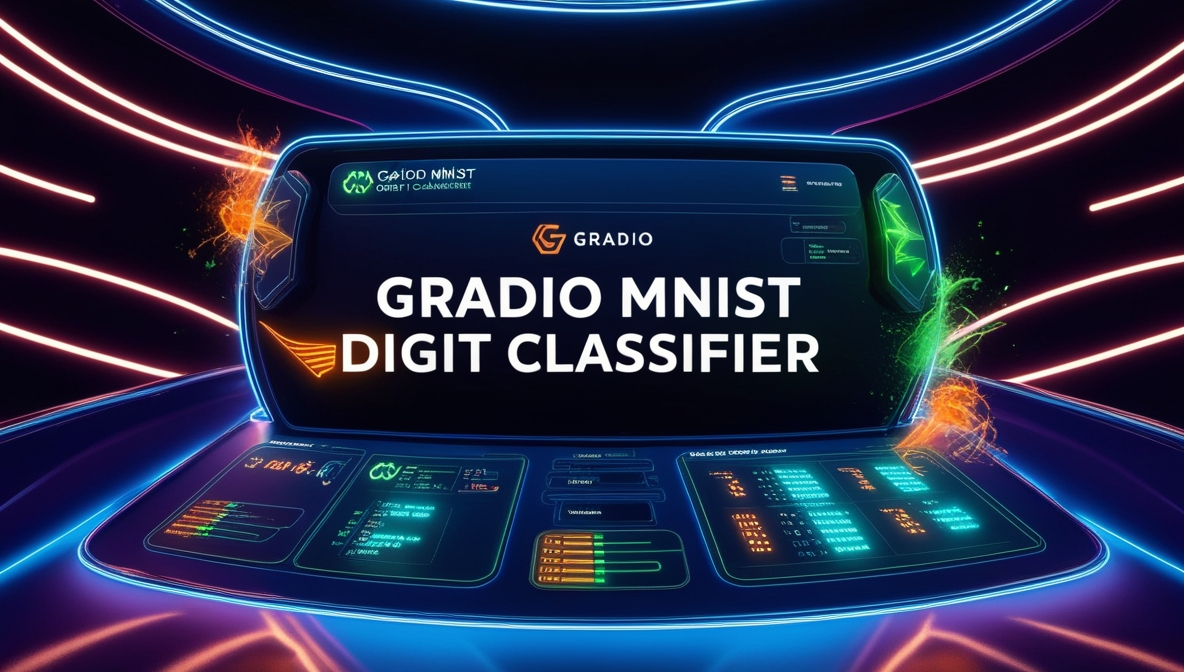

In [191]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [192]:
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

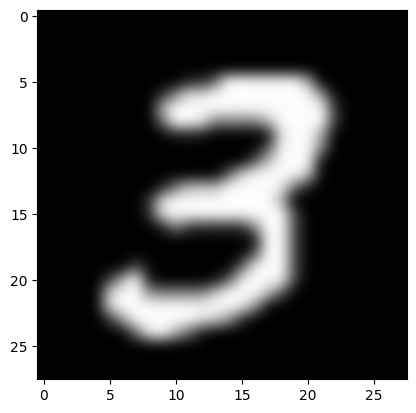

In [193]:
plt.imshow(train_images[7], cmap='gray', interpolation='bicubic')

In [194]:
train_images = train_images.reshape((60000,28,28,1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [195]:
train_images[7]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [196]:
train_labels[7]

3

In [197]:
train_labels = to_categorical(train_labels)
test_label = to_categorical(test_labels)

In [198]:
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

### Creacion de modelo neuronal

In [199]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
])

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [200]:
model.add(layers.Flatten())

In [201]:
model.add(layers.Dense(64,activation='relu'))

In [202]:
model.add(layers.Dense(10,activation='softmax'))

In [203]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [204]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8756 - loss: 0.4202
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9842 - loss: 0.0547
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9895 - loss: 0.0339


In [205]:
test_loss, test_acc = model.evaluate(test_images, tf.keras.utils.to_categorical(test_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0554


In [206]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9864000082015991


In [207]:
model.save('mnist_model.h5')

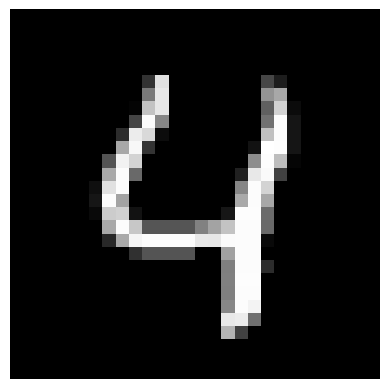

In [208]:
imagen = test_images[4].reshape(28,28)
plt.imshow(imagen, cmap='grey')
plt.axis('off')
plt.show()

In [209]:
from tensorflow.keras.models import load_model
import numpy as np
modelo_cargado = load_model('mnist_model.h5')

In [210]:
nueva_imagen = test_images[4]
nueva_imagen = np.expand_dims(nueva_imagen,axis=0)

In [211]:
prediccion = modelo_cargado.predict(nueva_imagen)
digito = np.argmax(prediccion)
print(f'El modelo predice que el digito es un: {digito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
El modelo predice que el digito es un: 4


In [212]:
import netron
netron.start('mnist_model.h5')

Serving 'mnist_model.h5' at http://localhost:8080


('localhost', 8080)

In [214]:
import gradio as gr

modelo = tf.keras.models.load_model('mnist_model.h5')

def clasificar_imagen(imagen):
    imagen = imagen.reshape((1, 28, 28, 1))
    prediccion = modelo.predict(imagen)
    digito = np.argmax(prediccion)
    return str(digito)

interfaz = gr.Interface(fn=clasificar_imagen, inputs='sketchpad', outputs='text')
interfaz.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------
